<a href="https://colab.research.google.com/github/dorababupudi/LGMVIP-Tasks/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LetsGrowMore Virtual Internship Program
LGMVIP-Data Science Internship-July-23

Task-3: Stock Market Prediction And Forecasting Using Stacked LSTM (Beginner level task)
Probelm Statement
The objective of this project is to predict the closing stock price of Tata Global Beverages Ltd. for the next 28 days using a stacked LSTM neural network.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [ ]:
 stock_data= pd.read_csv('/content/drive/MyDrive/Datasets/Share Dataset.csv')
 stock_data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
stock_data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
stock_data['Turnover (Lacs)'].sum()


7936460.45

In [ ]:
stock_data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
stock_data=stock_data. iloc[::-1]

In [ ]:
stock_data.Date = pd.to_datetime(stock_data.Date,format="%Y-%m-%d")
stock_data.index = stock_data['Date']
stock_data.drop('Date', axis = 1,inplace = True)
stock_data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60


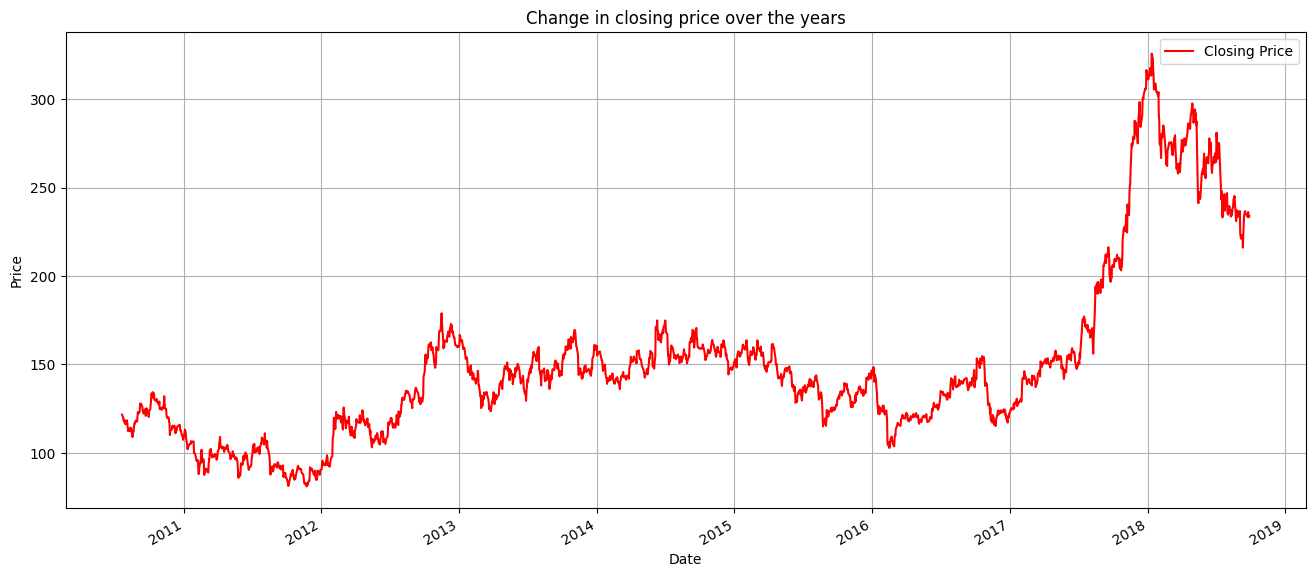

In [ ]:
plt.figure(figsize=(10,6))
stock_data['Close'].plot(kind='line',figsize=(16,7),color='r',label="Closing Price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price over the years")
plt.grid()

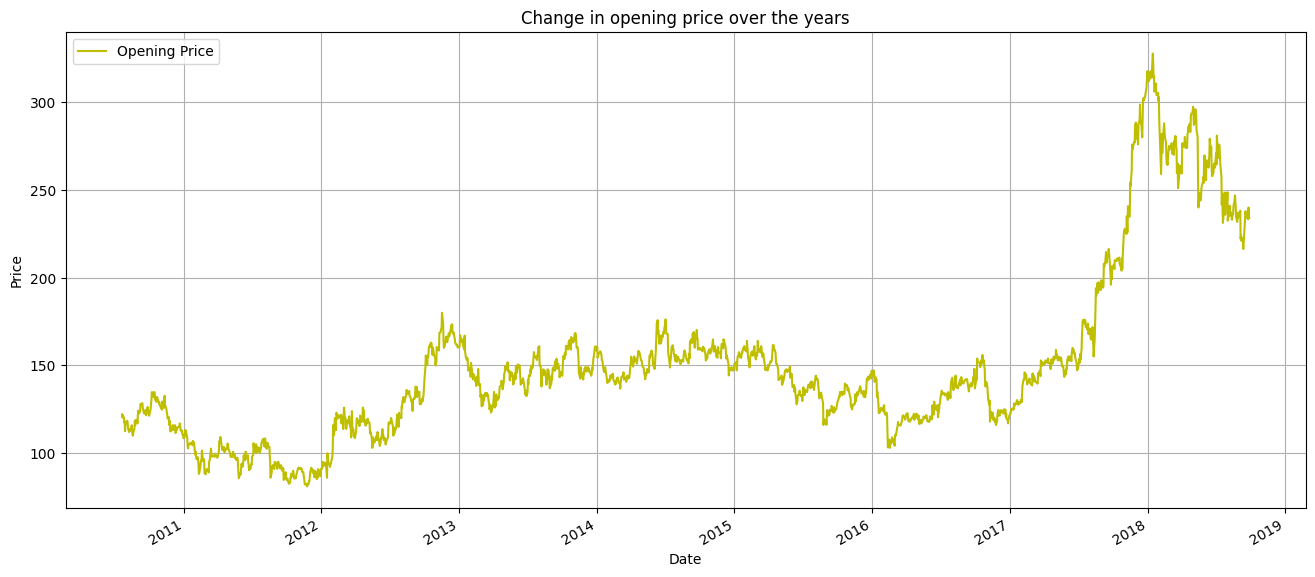

In [ ]:
plt.figure(figsize=(8,6))
stock_data['Open'].plot(kind='line',figsize=(16,7),color='y',label="Opening Price")

plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()

<Axes: >

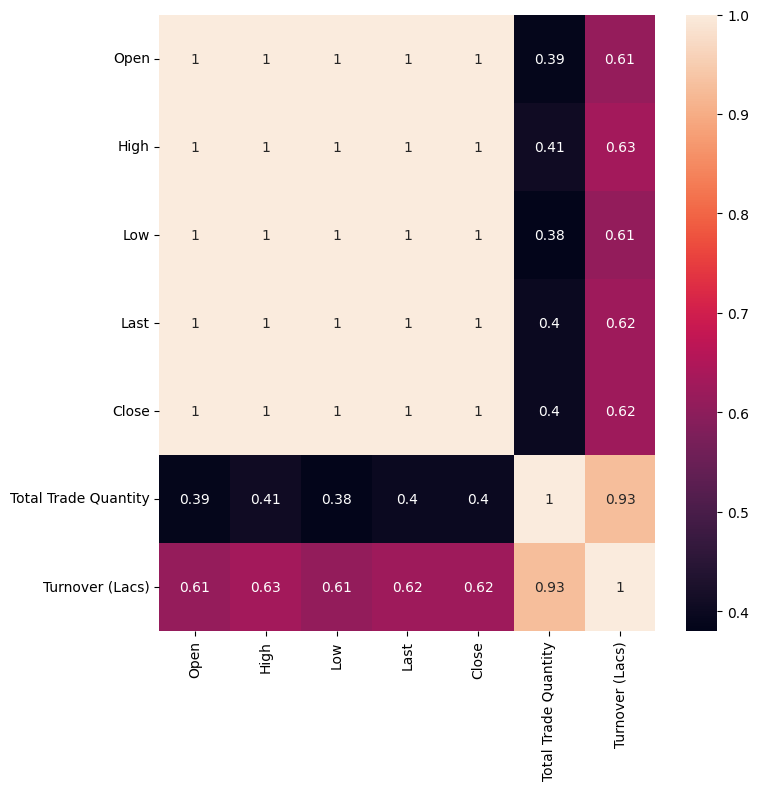

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(stock_data.corr(), annot = True)

In [ ]:
stock_data_high=stock_data.reset_index()['High']

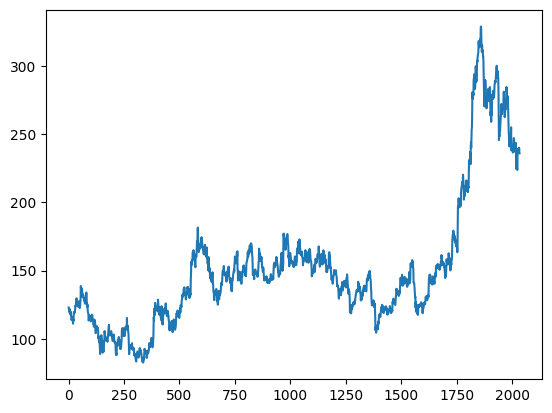

In [ ]:
plt.plot(stock_data_high)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
stock_data_high = scaler.fit_transform(np.array(stock_data_high).reshape(-1,1))

In [ ]:
stock_data.shape

(2035, 7)

In [ ]:
stock_data_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [ ]:
training_size = int(len(stock_data_high) * 0.75)
test_size = len(stock_data_high) - training_size
train_data, test_data = stock_data_high[0:training_size,:], stock_data_high[training_size:len(stock_data_high),:1]

In [ ]:
training_size,test_size

(1526, 509)

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 55, batch_size = 64, verbose = 1)

Epoch 1/55
23/23 [==============================] - 13s 64ms/step - loss: 0.0076 - val_loss: 0.0121
Epoch 2/55
23/23 [==============================] - 0s 15ms/step - loss: 0.0013 - val_loss: 0.0055
Epoch 3/55
23/23 [==============================] - 0s 15ms/step - loss: 8.5006e-04 - val_loss: 0.0042
Epoch 4/55
23/23 [==============================] - 0s 16ms/step - loss: 7.7335e-04 - val_loss: 0.0045
Epoch 5/55
23/23 [==============================] - 0s 15ms/step - loss: 7.5833e-04 - val_loss: 0.0038
Epoch 6/55
23/23 [==============================] - 0s 15ms/step - loss: 7.4047e-04 - val_loss: 0.0038
Epoch 7/55
23/23 [==============================] - 0s 16ms/step - loss: 6.7790e-04 - val_loss: 0.0034
Epoch 8/55
23/23 [==============================] - 0s 15ms/step - loss: 6.6259e-04 - val_loss: 0.0046
Epoch 9/55
23/23 [==============================] - 0s 16ms/step - loss: 6.5180e-04 - val_loss: 0.0035
Epoch 10/55
23/23 [==============================] - 0s 15ms/step - loss: 6.3068

Predict the next 15 days stock Price

In [ ]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [ ]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.6057544]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0